## first lets import the data

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix
from keras.datasets import fashion_mnist
# train_df = pd.read_csv("./data/fashion-mnist_train.csv")
# test_df = pd.read_csv("./data/fashion-mnist_test.csv")
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# x_train =train_df.iloc[:, 1:]#divide the data to x_train,y_train
# y_train=train_df.iloc[:, :1]
# x_test =test_df.iloc[:, 1:]#divide the data to x_train,y_train
# y_test=test_df.iloc[:, :1]
label = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
#lets look at the data
#train_df.heay
# x_test=x_test.reshape(-1,28*28)
# x_train=x_train.reshape(-1,28*28)
#x_train.shape


numpy.ndarray

In [25]:
#sns.scatterplot(data=train_df,hue="label",palette="coolwarm_r")
#x_red.shape
# label_train=pd.DataFrame([train_df.iloc[:,0]]).T
# label_train.value_counts()
# g = sns.countplot(y_train.value_counts())
# y_train.value_counts()
#sns.countplot(y_train)
# sns.countplot(x='label',data=y_train)

## lets try to visualize the images

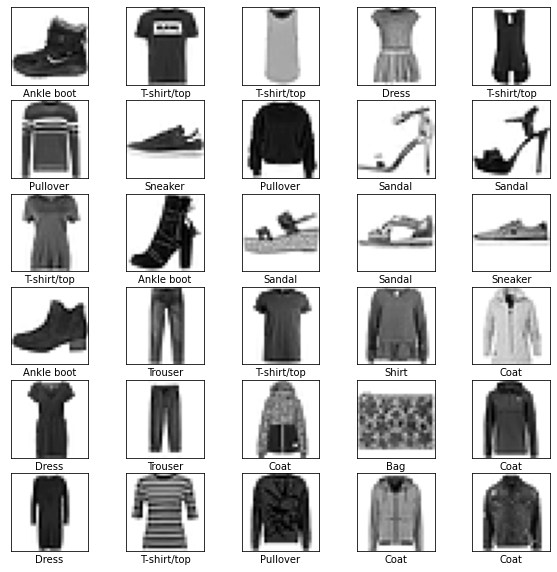

In [3]:
# Manually enter the meaningful name of each label
# Set the figure size
plt.figure(figsize=(10,10))
# Show only the first 30 pictures
for i in range(30):
    plt.subplot(6,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.array(x_train[i]).reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(label[y_train[i]])

In [4]:
pca=PCA(n_components=0.85)
x_red=pca.fit_transform(x_train)
#y_red=pca.tranform(y_train)
x_red_inv=pca.inverse_transform(x_red)
x_test_red=pca.transform(x_test)
x_red.shape

(60000, 43)

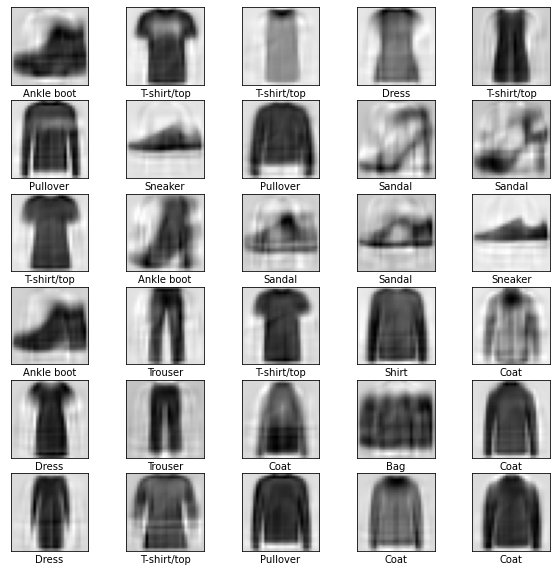

In [5]:
# Set the figure size
plt.figure(figsize=(10,10))
# Show only the first 30 pictures
for i in range(30):
    plt.subplot(6,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.array(x_red_inv[i]).reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(label[y_train[i]])

Text(0.5, 0, '95% Variance Retained')

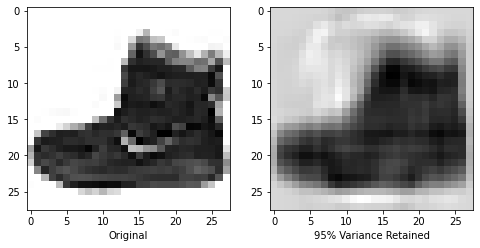

In [6]:
#lets show an original vs pca'ed one
# Set the figure size
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(np.array(x_train[0]).reshape(28,28), cmap=plt.cm.binary)
plt.xlabel("Original")
plt.subplot(1,2,2)
plt.imshow(np.array(x_red_inv[0]).reshape(28,28), cmap=plt.cm.binary)
plt.xlabel("95% Variance Retained")

In [34]:
x_red.shape

(60000, 84)

In [ ]:
from sklearn.manifold import TSNE
pca_vis=PCA(n_components=3)
pca_result=pca.fit_transform(x_train)
train_df['pca-one'] = pca_result[:,0]
train_df['pca-two'] = pca_result[:,1] 
train_df['pca-three'] = pca_result[:,2]
tsne_results= TSNE(random_state = 42, n_components=2, verbose=0, perplexity=40, n_iter=300).fit_transform(x_red)
train_df['tsne-2d-one'] = tsne_results[:,0]
train_df['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(10,10))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=train_df,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=train_df,
    legend="full",
    alpha=0.3,
    ax=ax2
)


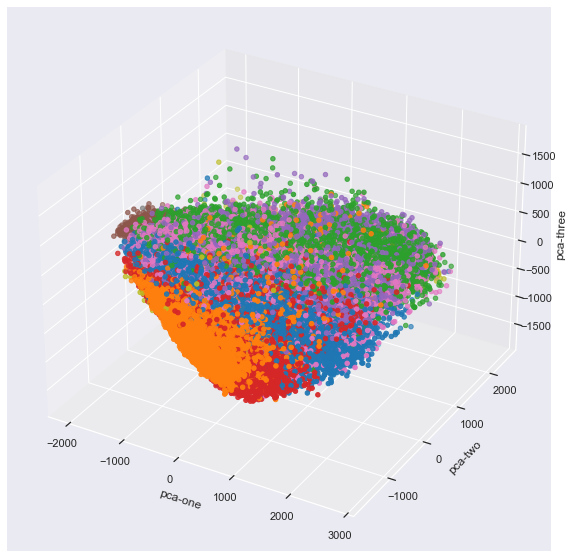

In [91]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=train_df["pca-one"], 
    ys=train_df["pca-two"], 
    zs=train_df["pca-three"], 
    c=train_df["label"], 
    cmap='tab10'
)
plt.legend(label)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

In [7]:
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
import xgboost as xgb
x_red=StandardScaler().fit_transform(x_red)
x_test_red=StandardScaler().fit_transform(x_test_red)
scores=dict()


In [ ]:
# knn_grid={'n_neighbors':[1,3,5,8],'weights':['uniform','distance']}
# knn_gs=GridSearchCV(KNeighborsClassifier(),knn_grid,verbose=3,n_jobs=-1)
# gs_results =knn_gs.fit(x_red,y_train.values.ravel())
# xgb_grid={'n_estimators':[50,100,150],'learning_rate':[0.5,1,1.5]}
# xgb_gs=GridSearchCV(xgb.XGBClassifier(use_label_encoder=False,eval_metric="mlogloss"),xgb_grid,cv=3,
#                     scoring='neg_mean_squared_error',verbose=3,n_jobs=-1)
# gs_results =xgb_gs.fit(x_red,y_train)
# ens_grid={'base_estimator':[LogisticRegression(multi_class='ovr',max_iter=1000),RandomForestClassifier()
#                            ,KNeighborsClassifier(n_neighbors=3,weights='distance')]}
# ada_gs=GridSearchCV(AdaBoostClassifier(),ens_grid,cv=3,
#                      scoring='accuracy',verbose=3,n_jobs=-1)
# gs_results=ada_gs.fit(x_red,y_train)
# rf_grid={'n_estimators':[50,100,200,400,500]}
# rf_gs=GridSearchCV(RandomForestClassifier(oob_score=True),rf_grid,cv=3, scoring='accuracy',verbose=3,n_jobs=-1)
# gs_result=rf_gs.fit(x_red,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


In [ ]:
gs_result.best_params_

In [8]:
knn_clf=KNeighborsClassifier(n_neighbors=3,weights='distance')
knn_clf.fit(x_red,y_train)
y_pred=knn_clf.predict(x_test_red)
scores["KNN"]=accuracy_score(y_test,y_pred)
print(classification_report(y_test, y_pred,digits=4))

              precision    recall  f1-score   support

           0     0.7890    0.8000    0.7944      1000
           1     0.9789    0.9720    0.9754      1000
           2     0.7725    0.7810    0.7767      1000
           3     0.8875    0.8680    0.8777      1000
           4     0.7741    0.7780    0.7761      1000
           5     0.9633    0.8920    0.9263      1000
           6     0.6468    0.6390    0.6429      1000
           7     0.8852    0.9410    0.9123      1000
           8     0.9675    0.9540    0.9607      1000
           9     0.9170    0.9500    0.9332      1000

    accuracy                         0.8575     10000
   macro avg     0.8582    0.8575    0.8576     10000
weighted avg     0.8582    0.8575    0.8576     10000



In [9]:
rf_clf=RandomForestClassifier(n_estimators=400,oob_score=True)
rf_clf.fit(x_red,y_train)
y_pred=rf_clf.predict(x_test_red)
#scores.append({"Random Forest":accuracy_score(y_test,y_pred)})
scores["Random Forest"]=accuracy_score(y_test,y_pred)
print(classification_report(y_test, y_pred,digits=4))

              precision    recall  f1-score   support

           0     0.8145    0.8520    0.8328      1000
           1     0.9938    0.9580    0.9756      1000
           2     0.7612    0.7970    0.7787      1000
           3     0.8610    0.8860    0.8733      1000
           4     0.7751    0.7960    0.7854      1000
           5     0.9281    0.9290    0.9285      1000
           6     0.7128    0.5980    0.6504      1000
           7     0.9183    0.9220    0.9202      1000
           8     0.9331    0.9620    0.9473      1000
           9     0.9259    0.9370    0.9314      1000

    accuracy                         0.8637     10000
   macro avg     0.8624    0.8637    0.8624     10000
weighted avg     0.8624    0.8637    0.8624     10000



In [10]:
xgb_clf=xgb.XGBClassifier(n_estimators=150,learning_rate=0.5,use_label_encoder=False,eval_metric="mlogloss")
xgb_clf.fit(x_red,y_train)
y_pred=xgb_clf.predict(x_test_red)
scores["XGBoost"]=accuracy_score(y_test,y_pred)
print(classification_report(y_test, y_pred,digits=4))

              precision    recall  f1-score   support

           0     0.8215    0.8420    0.8316      1000
           1     0.9897    0.9650    0.9772      1000
           2     0.7724    0.7940    0.7830      1000
           3     0.8884    0.8840    0.8862      1000
           4     0.7882    0.8000    0.7940      1000
           5     0.9602    0.9400    0.9500      1000
           6     0.6906    0.6540    0.6718      1000
           7     0.9243    0.9400    0.9321      1000
           8     0.9633    0.9710    0.9671      1000
           9     0.9426    0.9530    0.9478      1000

    accuracy                         0.8743     10000
   macro avg     0.8741    0.8743    0.8741     10000
weighted avg     0.8741    0.8743    0.8741     10000



In [12]:
ada_clf=AdaBoostClassifier(RandomForestClassifier(n_estimators=400,oob_score=True),learning_rate=0.5,random_state=42)
ada_clf.fit(x_red,y_train)
y_pred=ada_clf.predict(x_test_red)
#scores.append({"ADABoost":accuracy_score(y_test,y_pred)})
scores["ADABoost"]=accuracy_score(y_test,y_pred)
print(classification_report(y_test, y_pred,digits=4))

              precision    recall  f1-score   support

           0     0.8124    0.8530    0.8322      1000
           1     0.9928    0.9590    0.9756      1000
           2     0.7579    0.7950    0.7760      1000
           3     0.8657    0.8830    0.8743      1000
           4     0.7766    0.8030    0.7896      1000
           5     0.9307    0.9260    0.9283      1000
           6     0.7196    0.5980    0.6532      1000
           7     0.9196    0.9260    0.9228      1000
           8     0.9340    0.9630    0.9483      1000
           9     0.9243    0.9400    0.9321      1000

    accuracy                         0.8646     10000
   macro avg     0.8633    0.8646    0.8632     10000
weighted avg     0.8633    0.8646    0.8632     10000



# so im about to fit and train the model using a pipeline with voting classifier
## weird note : i used KMEANS with n_clusters=10 , but it dropped the model to 66%,
## without it , the model is 88% ,but it did make it run faster

In [15]:
from sklearn.model_selection import cross_val_predict

vote_clf =VotingClassifier(estimators=[
            ('knn_bag', BaggingClassifier(KNeighborsClassifier(n_neighbors=3,weights='distance'),n_jobs=-1)),
            ('xgb',xgb.XGBClassifier(learning_rate=0.5,use_label_encoder=False,eval_metric="mlogloss")),
            ('rf', RandomForestClassifier()),
            AdaBoostClassifier(RandomForestClassifier(n_estimators=400,oob_score=True),learning_rate=0.5,random_state=42)
        ], voting='soft', n_jobs=-1,verbose=True)
vote_clf.fit(x_red,y_train)
y_pred=vote_clf.predict(x_test_red)
print(classification_report(y_test, y_pred,digits=4))
scores["Votingz"]=accuracy_score(y_test,y_pred)

SyntaxError: invalid syntax (<ipython-input-15-fcf300f71493>, line 2)

In [ ]:
stk_clf= StackingClassifier(
        estimators=[
          ('lr', BaggingClassifier(KNeighborsClassifier(n_neighbors=3,weights='distance'),n_jobs=-1)),
          ('ada', AdaBoostClassifier(RandomForestClassifier(n_estimators=400,oob_score=True),learning_rate=0.5,random_state=42))
        ],final_estimator=xgb.XGBClassifier(n_estimators=150,learning_rate=0.5,use_label_encoder=False,eval_metric="mlogloss")
    , voting='soft', n_jobs=-1)
stk_clf.fit(x_red,y_train)
y_pred=stk.predict(x_test_red)
print(classification_report(y_test, y_pred,digits=4))
scores["Stacking"]=accuracy_score(y_test,y_pred)

In [ ]:
# xgb_clf=xgb.XGBClassifier(learning_rate=0.5,use_label_encoder=False,eval_metric="mlogloss")
# xgb_clf.fit(x_red,y_train.values.ravel())

In [ ]:
# y_pred=xgb_clf.predict(x_test_red)
# print(classification_report(y_test, y_pred,digits=4))
# print(accuracy_score(y_test,y_pred))

In [21]:
scores

{'KNN': 0.8506, 'Random Forest': 0.8635, 'XGBoost': 0.8871, 'ADABoost': 0.5792}

In [ ]:
x_train.shape

In [ ]:
x_red.shape